# DB 와 자료준비

매번 인터넷으로 받아오면 시간이 너무 오래 걸리기에, csv 파일로 내보내진 파일을 불러와서 DB 에 넣고 바로 시작한다.

In [1]:
import pandas as pd # 데이터프레임워크
from sqlalchemy import create_engine # 데이터베이스 툴킷
#### create table
# http://docs.sqlalchemy.org/en/latest/orm/tutorial.html
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# types 
# http://docs.sqlalchemy.org/en/latest/core/type_basics.html
from sqlalchemy import Column, Integer, String, Float

class UsedCar(Base):
    __tablename__ = 'used_car'

    id = Column(Integer, primary_key=True) 
    year = Column(Integer)
    brand = Column(String(16))
    model = Column(String(16))
    title = Column(String(16))
    miles = Column(Integer)
    vendor = Column(String(16))
    photos = Column(Integer)
    video = Column(Integer)
    exterior_color = Column(String(16))
    interior_color = Column(String(16))
    transmission = Column(String(16))
    drivertrain = Column(String(16))
    star = Column(Float)
    review_no = Column(String(16))
    price = Column(Integer)

    def __repr__(self):
        return rtform % (
                        self.id, self.year, self.brand, self.model, 
                        self.title, self.miles, self.vendor, 
                        self.photos, self.video, self.exterior_color, 
                        self.interior_color, self.transmission, self.drivertrain, 
                        self.star, self.review_no, self.price, )
    
    rtform = "<UsedCar(id = '%s', year = '%s', brand = '%s', model = '%s',title = '%s', miles = '%s', vendor = '%s', photos = '%s', video = '%s', exterior_color = '%s', interior_color = '%s', transmission = '%s', drivertrain = '%s', star = '%s', review_no = '%s', price = '%s)>"

UsedCar.__table__

import pickle
    
pw = pickle.load(open('./Data/pw.plk','rb'))

# write local car_info
#engine = create_engine("mysql+mysqldb://root:" + pw.data + "@127.0.0.1/car_info", echo=True)
engine = create_engine("mysql+mysqldb://root:"+ pw +"@db/used_car", echo=True)
    
Base.metadata.create_all(engine)



df= pd.read_csv('car_info.csv')
df.to_sql(name="used_car", con=engine, if_exists='replace')

2018-04-12 19:41:38,949 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2018-04-12 19:41:38,950 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 19:41:38,955 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2018-04-12 19:41:38,956 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 19:41:38,958 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8' and `Collation` = 'utf8_bin'
2018-04-12 19:41:38,958 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 19:41:38,960 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2018-04-12 19:41:38,961 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 19:41:38,962 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2018-04-12 19:41:38,963 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 19:41:38,964 INFO sqlalchemy.engine.base.Engine SELECT CAST('test collated returns' AS CHAR CHARACTER SET utf8) COLLATE utf8_bin AS anon_1
2018-04-12 19

/opt/conda/lib/python3.6/site-packages/sqlalchemy/dialects/mysql/base.py:1569: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


2018-04-12 19:41:39,188 INFO sqlalchemy.engine.base.Engine COMMIT
2018-04-12 19:41:39,196 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2018-04-12 19:41:39,270 INFO sqlalchemy.engine.base.Engine INSERT INTO used_car (`index`, `Unnamed: 0`, company, drivertrain, exterior_color, interior_color, mile, photos, price, review_no, star, subname, title, transmission, vendor, video, year) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
2018-04-12 19:41:39,270 INFO sqlalchemy.engine.base.Engine ((0, 0, 'Subaru', '4wd', 'Desert Khaki', 'Black', 26525, 23, 17999, 43, 5.0, 'Crosstrek', 'Subaru Crosstrek 2.0i', '5-speed', '1st Choice Autos', 1, 2016), (1, 1, 'Mazda', '4wd', 'Silver', 'Gray', 118205, 21, 3750, 43, 5.0, 'Tribute', 'Mazda Tribute LX V6', '4-speed', '1st Choice Autos', 1, 2003), (2, 2, 'Ford', '4wd', 'Race Red', 'Black', 2330, 32, 53900, 244, 5.0, 'F-150', 'Ford F-150 Raptor', '1-speed', 'Gilbert & Baugh Ford', 1, 2018), (3, 3, 'Porsche', '4wd', 'Gray',

# 의존성 설치

In [41]:
import MySQLdb, pickle
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from collections import Counter
from matplotlib import pyplot as plt

In [25]:
# read local car_info popular 
# pw = pickle.load(open('./Data/pw.p','rb'))

# http://mysql-python.sourceforge.net/MySQLdb.html

db = MySQLdb.connect(
    host="mysql",
    user="root",
    passwd='0',
    db='used_car',
    charset='utf8',
)

SQL_QUERY = """
    SELECT *
    FROM used_car;
"""

train = pd.read_sql(SQL_QUERY, db)
train.head(20)

,index,brand,drivetrain,exterior_color,interior_color,miles,model,photos,price,review_no,star,title,transmission,vendor,video,year
0,0,BMW,rwd,Black Sapphire Metallic,Amaro Brown,78534,535,32,24449,81,5.0,BMW 535 i,8-speed,Amazing Luxury Cars - Snellville,0,2015
1,1,Bentley,4wd,Beluga,Beluga,2319,Bentayga,32,179801,620,5.0,Bentley Bentayga W12 Signature,8-speed,Select Luxury Cars,0,2018
2,2,Mercedes-Benz,4wd,Steel Gray Metallic,Black,7478,AMG,32,87999,0,0.0,Mercedes-Benz AMG GT S,7-speed,Drive A Dream,0,2016
3,3,Ford,4wd,Race Red,Black,2330,F-150,32,53900,244,5.0,Ford F-150 Raptor,1-speed,Gilbert & Baugh Ford,1,2018
4,4,McLaren,rwd,Carbon Black,Black,12289,MP4-12C,32,116496,91,4.5,McLaren MP4-12C Coupe,7-speed,Metrolina Auto Group,1,2012
5,5,Mercedes-Benz,rwd,Iridium Silver Metallic,Black,58204,E,32,18549,26,5.0,Mercedes-Benz E 550,7-speed,iNetwork Auto Group,1,2010
6,6,Audi,4wd,Gray,Black,38145,R8,32,59950,20,4.5,Audi R8,6-speed,Exotic Motor Cars,1,2008
7,7,Porsche,4wd,Seal Grey Metallic,Graphite Gray,35022,911,25,18500,1268,5.0,Porsche 911 Carrera,5-speed,Hanna Imports,1,2002
8,8,Subaru,4wd,Regal Blue Pearl,Dark Gray,132487,Impreza,31,500,210,4.5,Subaru Impreza 2.5i,4-speed,Midwest Auto Store,1,2006
9,9,Chevrolet,rwd,Beach,Brownstone,11124,Corvette,28,67900,86,5.0,Chevrolet Corvette Z06,8-speed,Skyline Imports,1,2016


In [26]:
brand_list = []
# 모든 회사 중 가장 공통된(이름이 들쪽날쭉하지 않고 균일한 것)중 30개를 고른다.
# https://docs.python.org/2/library/collections.html#collections.Counter.most_common
for brand in Counter(train.brand).most_common(30):
    brand_list.append(brand[0])

In [27]:
# most_common 30 이 아닌 것들의 인덱스를 구한다.
idx_list = []
idx = 0
for i in train["brand"]:
    if i not in brand_list:
        idx_list.append(idx)
    idx += 1

In [28]:
# 행, 열 개수 반환
train.shape

(200, 16)

In [29]:
# 인덱스를 이용해서 most_common 30 만 남기고 train 데이터 프레임워크를 지운다.
train = train.drop(idx_list)
# 남아있는 데이터 프레임워크의 인덱스 컬럼을 생성한다.
train.reset_index(drop=True, inplace=True)
train = train.drop("index", axis=1)

Feature engineering

In [30]:
# 분류 특징(열)을 회사명과 서브이름으로
categorical_features = ['brand', 'model']

In [31]:
# 더미 데이터 생성. 두 특성의 상관을 분석하기 위해..
# 값이 없는 문자데이터이기 때문에 좌표를 부여해 준 것과 같다.
# 더미는 행렬로 생성
dummy_cat = pd.get_dummies(train[categorical_features])
dummy_cat.head()

,brand_Acura,brand_Alfa,brand_Audi,brand_BMW,brand_Bentley,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Dodge,brand_Ferrari,...,model_Tucson,model_Tundra,model_Viper,model_Volt,model_WRX,model_Wrangler,model_X-Type,model_X5,model_XJ,model_i8
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# 숫자 특성(열) 설정
numerical_features = ['year', 'miles','price']

In [33]:
# 숫자 특성(열)의 값들을 로그함수로 노멀라이즈 해준다. 숫자 크기 뿐 아니라 편차도 줄어든다.
normalize_num = np.log1p(train[numerical_features])
normalize_num.head()

,year,miles,price
0,7.608871,11.271300,10.104385
1,7.610358,7.749322,12.099612
2,7.609367,8.919854,11.385092
3,7.610358,7.754053,10.894904
4,7.606387,10.971727,9.828225


In [34]:
# pre_train = pd.merge(normalize_num, dummy_cat) 
# 특성들을 합쳐준다.
X_train_0 = normalize_num.join(dummy_cat)
# 값 특징열을 y_traing 이라는 데이터 페이스로 설정하고
y_train = X_train_0["price"]
# 이 특징열을 뺀 나머지 정보를 X_train 에 넣는다.
X_train = X_train_0.drop("price", axis=1)

In [35]:

# xgboost 는 분류기를 세트로 묶어서 정확도를 축정하는 예측 기법
# https://github.com/dmlc/xgboost/tree/master/python-package
from xgboost import XGBRegressor
# http://scikit-learn.org/stable/install.html
# 교차검정, 모델선택, KFOLD - 다모름
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=2018)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)

In [36]:
ml = XGBRegressor(n_estimators=1000, learning_rate=0.05, verbose=False)

In [37]:
%time score = cross_val_score(ml, X_train, y_train, cv=k_fold, n_jobs=-1, scoring="r2").mean()

print("Score = {0:.5f}".format(score))

CPU times: user 60 ms, sys: 30 ms, total: 90 ms
Wall time: 1.99 s
Score = 0.65971


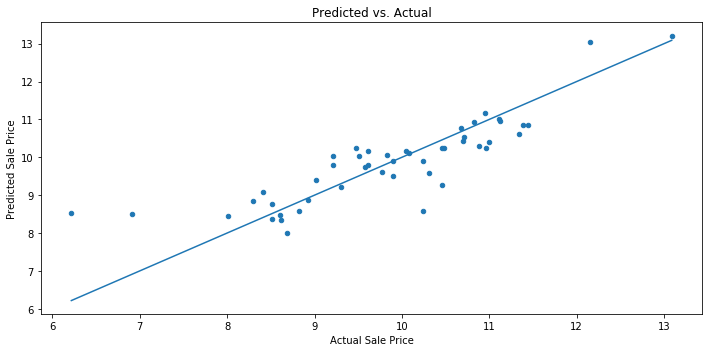

In [42]:
ml = ml.fit(X_train1, y_train1)
y_pred = ml.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [43]:
pickle.dump(ml, open("./Flask/models/model.plk","wb"))

In [44]:
actual_car_info = train[["brand", "model","year","miles","price"]]
pickle.dump(actual_car_info, open("./Flask/models/actual_car_info.plk","wb"))

In [46]:
brand = str(input("brand: "))
model = str(input("model: "))
year = int(input("year: "))
miles = int(input("miles: "))

brand: honda
model: civic
year: 2002
miles: 35000


In [47]:
target = pd.DataFrame(columns = [X_train1.columns])

In [48]:
pickle.dump(X_train1.columns, open("./Flask/models/column.plk","wb"))

In [49]:
cdx = 0
for col in X_train.columns:
    if col == 'brand'+"_"+brand:
        break;
    cdx += 1
cdx

147

In [50]:
sdx = 0
for col in X_train.columns:
    if col == 'model'+"_"+model:
        break;
    sdx += 1
sdx

147

In [52]:
target_list = np.zeros_like(X_train.loc[0])

In [53]:
pickle.dump(target_list, open("./Flask/models/target_list.plk","wb"))

In [54]:
target_list[cdx] = 1
target_list[sdx] = 1
target_list[0] = year
target_list[1] = miles

IndexError: index 147 is out of bounds for axis 0 with size 147

In [55]:
for i in range(1):
    target.loc[i] = target_list

In [56]:
target

,year,miles,brand_Acura,brand_Alfa,brand_Audi,brand_BMW,brand_Bentley,brand_Cadillac,brand_Chevrolet,brand_Chrysler,...,model_Tucson,model_Tundra,model_Viper,model_Volt,model_WRX,model_Wrangler,model_X-Type,model_X5,model_XJ,model_i8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
numerical_features = ['year', 'miles']
target[numerical_features] = np.log1p(target[numerical_features])

In [58]:
target

,year,miles,brand_Acura,brand_Alfa,brand_Audi,brand_BMW,brand_Bentley,brand_Cadillac,brand_Chevrolet,brand_Chrysler,...,model_Tucson,model_Tundra,model_Viper,model_Volt,model_WRX,model_Wrangler,model_X-Type,model_X5,model_XJ,model_i8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
price_log = ml.predict(target)

In [60]:
price_log

array([12.062366], dtype=float32)

In [61]:
price = np.exp(price_log)
int(price)

173228

In [62]:
same_model = actual_car_info[actual_car_info["model"]==model] 
year_price = same_model[["year", "price"]]
year_price_list = year_price.groupby("year").agg({'price':np.mean}).astype('int')
year_price_list = year_price_list.reset_index()
year_price_list

,year,price


In [63]:
year_price_list["year"] = year_price_list["year"].apply(lambda x: str(x) )

In [64]:
year_price_list["price"] = year_price_list["price"].apply(lambda x: str(x) )

In [65]:
list(year_price_list["price"])

[]